# Acumulación, ablación, balance de masa y el flujo de hielo resultante

Objetivos de este cuaderno:
- Obtenga una comprensión básica de la acumulación, la ablación y el balance de masa de los glaciares.
- Comprender el vínculo entre el balance de masa y el flujo de hielo
- Implementar un experimento simple para calcular el flujo de hielo en un glaciar en equilibrio

In [1]:
from oggm_edu import Glacier, MassBalance, GlacierBed

*Aviso de derechos de autor: las siguientes secciones se basan en gran medida en el libro "La física de los glaciares" de Cuffey y Paterson, (2010). Las imágenes del glaciar están tomadas de [open glacier graphics](http://edu.oggm.org/en/latest/glacier_basics.html) en OGGM-Edu, realizadas por Anne Maussion, [open glacier graphics](http://edu.oggm.org/en/latest/glacier_basics.html).*

El **balance de masa** es el resultado de varios procesos que agregan masa al glaciar (**acumulación**) o eliminan masa del glaciar (**ablación**).
<img src="https://raw.githubusercontent.com/OGGM/glacier-graphics/master/glacier_intro/png/glacier_03.png" width="33%" align="left">
<img src="https://raw.githubusercontent.com/OGGM/glacier-graphics/master/glacier_intro/png/glacier_04.png" width="33%" align="left">
<img src="https://raw.githubusercontent.com/OGGM/glacier-graphics/master/glacier_intro/png/glacier_05.png" width="33%" align="left">

## Procesos de acumulación

Los procesos de acumulación son todos los procesos que agregan nieve o hielo a un glaciar (superficie). Los procesos de acumulación más importantes se enumeran a continuación en orden de importancia relativa:

- **Precipitación sólida** (nevada)
Las nevadas varían sustancialmente con la latitud y la altitud, donde los principales factores que determinan las tasas de nevadas son:
- **Contenido de vapor de agua** regido por el [Clausius-Clapeyron-relationship](https://en.wikipedia.org/wiki/Clausius%E2%80%93Clapeyron_relation#Applications): cuanto más cálido es el aire, más agua puede contener y, por lo tanto, más precipitación se puede formar
- **Estratificación** de la atmósfera: se requiere una capa bajo cero en la atmósfera inferior para que la precipitación llegue al suelo en forma sólida
- **Tasa de enfriamiento**: se producen altas tasas de nevadas cuando la nieve se enfría rápidamente, p. en sistemas frontales o mediante levantamiento orográfico

- **Redistribución por viento y avalanchas**
La acumulación puede diferir de las nevadas debido a los vientos que transportan la nieve sobre la superficie de un glaciar: la interacción entre el viento y la topografía crea regiones de asimilación y deposición de nieve. Además, las avalanchas pueden acumular cantidades inusualmente grandes de nieve en zonas favorables. Las avalanchas son particularmente importantes para los glaciares de montaña en valles escarpados.

- **Recongelación del agua de deshielo**
La recongelación del agua de deshielo puede ocurrir en la superficie del glaciar o dentro del cuerpo del glaciar, donde comúnmente se denomina acumulación englacial o interna. La recongelación del agua de deshielo no contribuye explícitamente al balance de masa del glaciar, pero debe restarse del derretimiento total para evaluar la escorrentía neta.

- **Deposición**
La deposición se refiere a los procesos que acumulan agua o vapor de agua directamente en la superficie del glaciar, es decir, lluvia helada y resublimación.

## Procesos de ablación

Los procesos de ablación son todos los procesos que eliminan la nieve o el hielo de un glaciar. Los procesos de ablación más importantes se enumeran a continuación en orden de importancia relativa:

- **Derretimiento y escorrentía**

El derretimiento y la escorrentía representan la mayor parte de la pérdida de masa de los glaciares y son impulsados ​​por el desequilibrio energético neto entre la atmósfera y la superficie del glaciar. Los contribuyentes más importantes son la radiación neta y los flujos turbulentos de calor sensible y latente. Una vez que la temperatura de la superficie del glaciar está en el punto de fusión, es decir, la superficie del glaciar se calentó lo suficiente, las tasas de fusión aumentan en proporción al flujo neto de energía.

- **Sublimación**
La sublimación se refiere al cambio de fase del estado sólido al estado gaseoso, p. la transición directa de nieve y hielo a vapor de agua. Es la principal fuente de pérdida de masa en ambientes donde las temperaturas superficiales apenas alcanzan el punto de fusión. La sublimación aumenta con el aumento de la temperatura de la superficie y la velocidad del viento y con la disminución de la humedad, por lo tanto, es más fuerte en ambientes secos y cálidos.
La fusión y la sublimación pueden contrarrestarse entre sí: a medida que la sublimación consume energía y la transforma en calor latente, la energía disponible para la fusión disminuye.

- **Parto**
El parto es la separación de bloques de hielo del margen de un glaciar. La mayoría de los partos ocurren en los márgenes de los glaciares que se mantienen o flotan en el agua. El desprendimiento de glaciares que terminan en el océano, los llamados glaciares *de marea*, representa gran parte de la pérdida de masa, p. para más del 90% de la ablación de la Antártida y aproximadamente la mitad de la ablación de Groenlandia. El proceso también es importante para los glaciares de montaña que terminan en lagos profundos o en el océano.

Este bonito gráfico de [antarcticglaciers.org](http://www.antarcticglaciers.org/) resume los diferentes procesos de acumulación y ablación:
<br>
<img src="https://www.antarcticglaciers.org/wp-content/uploads/2018/11/glaciers-as-a-system.png" width="60%">

## Balance de masa

Las tasas de los procesos de acumulación y ablación, sumadas sobre el glaciar y a lo largo del tiempo, determinan el *balance de masa del glaciar*: $\dot{m}$, el cambio en la masa total de nieve y hielo,

$$\dot{m} = \text{acumulación} + \text{ablación}.$$

La masa se redistribuye continuamente en un glaciar: la masa acumulada en la parte superior del glaciar se transporta hacia abajo, lo que se indica con la flecha negra en la figura anterior. La fuerza impulsora de este *flujo de hielo* es la gravedad. Por lo tanto, el balance de masa de una región en un glaciar depende no solo de los intercambios de masa inducidos por la acumulación y la ablación, sino también del transporte de hielo impulsado por la gravedad desde el área de acumulación hasta el área de ablación.

En general, el balance de masa y el flujo de hielo están vinculados a través de la ecuación de continuidad, lo que implica la conservación de la masa,

$$\frac{\H parcial}{\t parcial} = \dot{m} - \nabla \cdot \vec{q},$$

donde $H$ es el espesor del hielo, $\dot{m}$ el balance de masa y $\vec{q}$ el flujo de hielo.

## Acumulación, ablación y flujo de hielo con OGGM

En este ejemplo, ilustraremos esencialmente la serie de imágenes [OGGM-Edu glacier graphics](http://edu.oggm.org/en/latest/glacier_basics.html#) usando OGGM.

### Establece la escena

En la introducción de OGGM-Edu [website](http://edu.oggm.org/en/latest/glacier_basics.html), se muestra una sección transversal de un glaciar de montaña típico:
<img src="https://raw.githubusercontent.com/OGGM/glacier-graphics/master/glacier_intro/png/glacier_01.png" width="60%">

Tal glaciar se puede reconstruir en OGGM, como se hace en [intro notebook](edu_intro_es.ipynb). Primero, definimos un perfil de lecho rocoso lineal con un área de acumulación más amplia, típico de los glaciares de montaña. El área de acumulación está determinada por el ancho en la parte superior del glaciar, el ancho en intro notebook y la extensión vertical hacia abajo del glaciar.
Queremos crear un lecho glaciar que tenga 1500 metros de ancho en la parte superior y 500 metros de ancho desde el ELA hacia abajo. También queremos que el área de acumulación represente 1/3 de la extensión vertical total del glaciar.

In [2]:
# We define a bed with a cone shape accumulation zone and a
# square ablation zone.
top = 3400
bottom = 0
wide_narrow_bed = GlacierBed(altitudes=[top, (top-bottom) * 2/3, bottom],
                             widths=[1500, 500, 500])

Tracemos la geometría del glaciar.

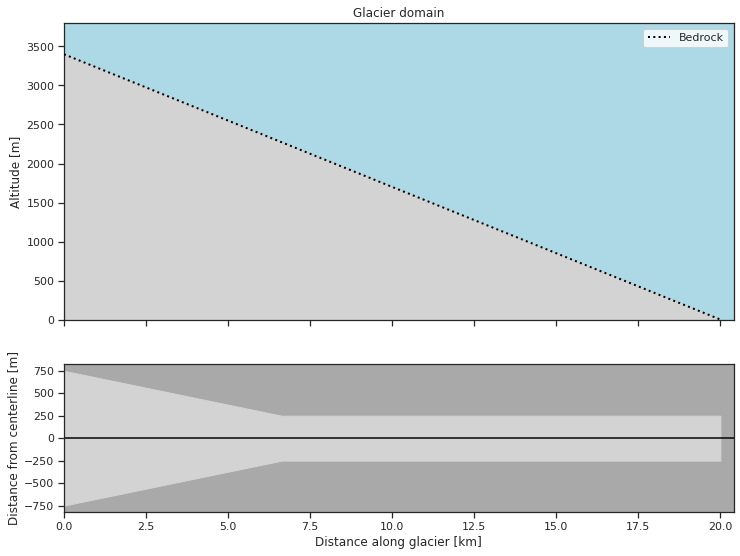

In [3]:
wide_narrow_bed.plot()

Entonces necesitaremos un balance de masa. En nuestro caso será un balance de masa lineal simple, definido por la altitud de la línea de equilibrio (ELA) y un gradiente de balance de masa lineal con respecto a la elevación (en [mm m$^{-1}$]). La altitud de la línea de equilibrio se encuentra en la transición entre la zona de acumulación y ablación Podemos usar la misma expresión que usamos para crear la transición de la cama:

In [4]:
# Since we have full control over the altitude and width we easily
# specify the ELA to match a certain transition.
mass_balance = MassBalance(ela=(top-bottom)*2/3, gradient=3)

Ahora que tenemos todos los ingredientes para inicializar el glaciar.

In [5]:
glacier = Glacier(bed=wide_narrow_bed, mass_balance=mass_balance)

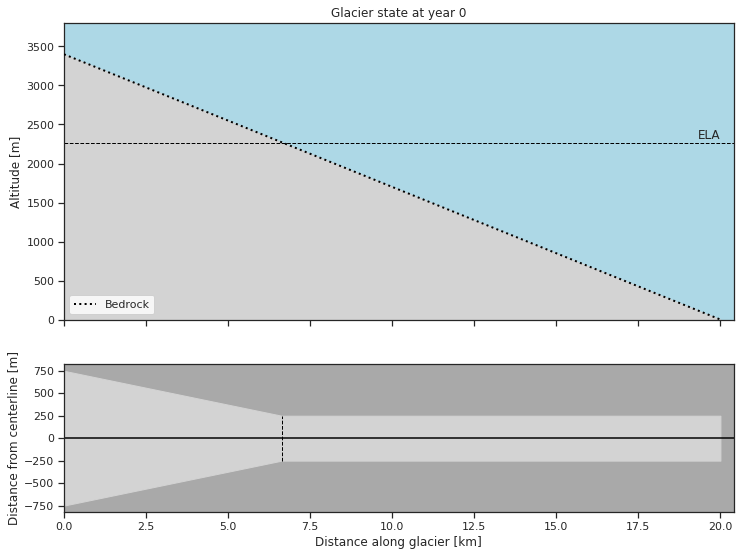

In [6]:
glacier.plot()

Progresemos el glaciar al equilibrio

In [7]:
glacier.progress_to_equilibrium()

Y vamos a trazarlo

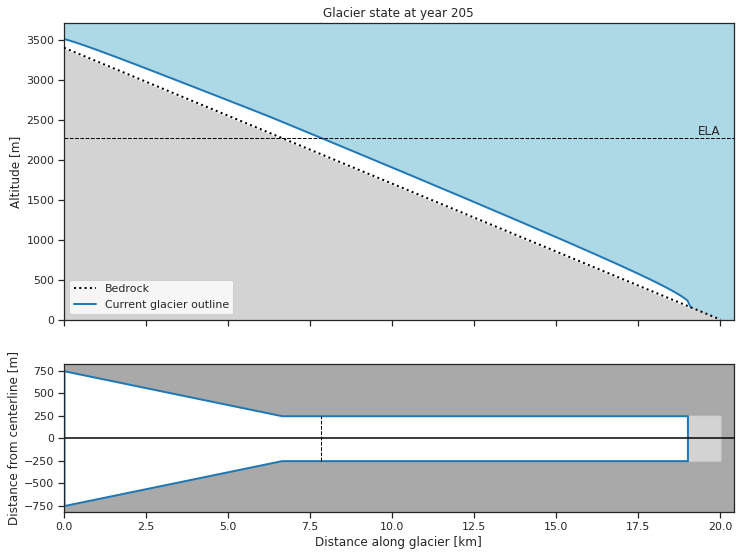

In [8]:
glacier.plot()

<div class="alert alert-success"> <b>Ejercicio</b>: intente cambiar los parámetros de la geometría del glaciar: ancho superior, ancho en el ELA, ELA inferior o agregando más geometría al lecho. ¿Crees que un glaciar más ancho o más estrecho alcanzará el equilibrio más rápido o más lento?
</div>

In [9]:
# Your input



### Balance de masa de un glaciar en equilibrio

Para que un glaciar esté en equilibrio, requerimos que el balance de masa específico (acumulación + ablación) tenga un promedio de cero durante un año en el glaciar. Para verificar este requisito, podemos usar el modelo de balance de masa para calcular el balance de masa anual y calcular un promedio ponderado de ancho en todas las altitudes:

In [10]:
glacier.specific_mass_balance

-0.48756623584850356

Al final del año, el balance de masa específico total es cero, ¡pero esto no significa que el balance de masa sea cero en todas partes! Una situación muy clásica se parece a la imagen de abajo: balance de masa positivo en la parte superior (más acumulación, menos ablación) y negativo en la lengua (menos acumulación, más ablación).
<img src="https://raw.githubusercontent.com/OGGM/glacier-graphics/master/glacier_intro/png/glacier_05.png" width="60%" >

### Flujo de hielo a lo largo de un glaciar en equilibrio

<img src="https://raw.githubusercontent.com/OGGM/glacier-graphics/master/glacier_intro/png/glacier_06.png" width="60%" >

En equilibrio, el espesor del hielo $H$ no cambia con el tiempo y la ecuación de continuidad se reduce a,

$$\punto{m} =\nabla\vec{q}.$$

Esto significa que el balance de masa del glaciar únicamente determina el flujo de hielo si el glaciar se encuentra en estado estacionario. Por lo tanto, el flujo de hielo se puede calcular integrando verticalmente el balance de masa; en el caso unidimensional, el flujo de hielo es la suma del balance de masa por encima de una determinada altura de referencia $z$.

Entonces, el flujo de hielo puede calcularse mediante la integración discreta del balance de masa.
Para este ejemplo, vamos a ir más allá de las capacidades integradas de `oggm_edu.Glacier`.
Esto también muestra cómo puede acceder a las propiedades del 'Glaciar' y crear sus propios gráficos.

In [11]:
# import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [12]:
# We compute the ice flux from the mass balance, widths and the resolution.
# We take the cumulative sum.
mb = glacier.mass_balance.get_annual_mb(glacier.current_state.surface_h)
# Multiply by the widths (converted to meters) and resolution to get
# the grid point mass balance
mb = mb * glacier.bed.widths * glacier.bed.map_dx *\
        glacier.current_state.dx_meter
# Integration
q = (mb).cumsum()

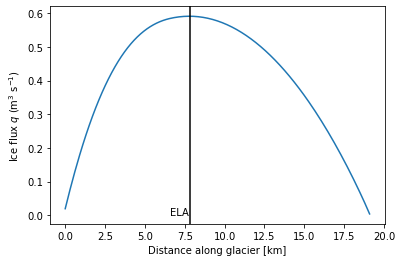

In [13]:
# Create a plot
fig, ax = plt.subplots()
ax.plot(glacier.bed.distance_along_glacier[q>0], q[q>0])
# Add a vertical line indicating the ELA x location.
idx = np.argmin(np.abs(mb))
ax.axvline(glacier.bed.distance_along_glacier[idx], c='k')
ax.text(glacier.bed.distance_along_glacier[idx]-0.1, 0, 'ELA',
            ha='right')
ax.set_xlabel('Distance along glacier [km]')
ax.set_ylabel('Ice flux $q$ (m$^3$ s$^{-1}$)');

Por construcción, el flujo de hielo es máximo en la altitud de la línea de equilibrio y cero en el extremo del glaciar.

## Llévate puntos a casa

- Los procesos de acumulación incluyen todos los procesos que añaden nieve o hielo a un glaciar, p.
- Precipitación sólida
- Redistribución de la nieve por viento y avalancha
- Recongelación del agua de deshielo
- Resublimación y lluvia helada
- Los procesos de ablación son todos los procesos que eliminan la nieve o el hielo de un glaciar, p.
- Derretimiento y escorrentía
- Sublimación
- Parto
- Las tasas de acumulación y ablación determinan el balance de masa del glaciar, es decir, el cambio en la masa total de nieve y hielo.
- Los glaciares fluyen por gravedad
- La conservación de masa implica un vínculo entre el espesor del hielo, el balance de masa y el flujo de hielo

## Referencias

- K. M. Cuffey y WSB Paterson, (2010), [The Physics of Glaciers](https://www.elsevier.com/books/the-physics-of-glaciers/cuffey/978-0-12-369461-4)
- AntarcticGlaciers.org, [glacier mass-balance](http://www.antarcticglaciers.org/glacier-processes/mass-balance/)

## ¿Que sigue?

xx_markdown_enlace_xx